In [28]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import ipywidgets  # Библиотека для интерактивных контролов в jupyter notebook'е

%matplotlib inline

In [29]:
coins = pd.read_csv('coins.csv')

In [42]:
coins

,date,price,txCount,txVolume,activeAddresses,symbol,name,open,high,low,close,volume,market
0,2013-04-28,135.300000,41702.0,6.879868e+07,117984.0,BTC,Bitcoin,135.300000,135.980000,132.100000,134.210000,0.0,1.500520e+09
1,2013-04-28,4.300000,9174.0,4.431952e+07,17216.0,LTC,Litecoin,4.300000,4.400000,4.180000,4.350000,0.0,7.377340e+07
2,2013-04-29,134.440000,51602.0,1.138128e+08,86925.0,BTC,Bitcoin,134.440000,147.490000,134.000000,144.540000,0.0,1.491160e+09
3,2013-04-29,4.370000,9275.0,3.647810e+07,18395.0,LTC,Litecoin,4.370000,4.570000,4.230000,4.380000,0.0,7.495270e+07
4,2013-04-30,144.000000,47450.0,8.426632e+07,76871.0,BTC,Bitcoin,144.000000,146.930000,134.050000,139.000000,0.0,1.597780e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...
37583,2018-06-06,0.293325,4830.0,2.312763e+05,659.0,XLM,Stellar,0.293325,0.299955,0.289500,0.298269,51165000.0,5.450080e+09
37584,2018-06-06,0.039586,7205.0,4.947760e+06,18228.0,XVG,Verge,0.039586,0.039737,0.037680,0.038797,9307450.0,5.959400e+08
37585,2018-06-06,239.760000,10687.0,3.986308e+07,96516.0,ZEC,Zcash,239.750000,240.340000,229.210000,236.050000,56887000.0,9.769940e+08
37586,2018-06-06,0.127555,1313.0,1.596436e+07,733.0,ZIL,Zilliqa,0.127555,0.133254,0.124194,0.131766,54667900.0,9.348810e+08


In [31]:
coins['symbol'].value_counts().shape[0]

66

In [32]:
start = coins['date'].min()
final = coins['date'].max()
print('start date: {}\nfinal date: {}'.format(start, final))

start date: 2013-04-28
final date: 2018-06-06


In [33]:
coins.shape

(37588, 13)

In [34]:
coins.isnull().sum()

date                  0
price               327
txCount            1520
txVolume           1830
activeAddresses    1520
symbol                0
name                  0
open                  0
high                  0
low                   0
close                 0
volume                0
market                0
dtype: int64

In [39]:
coins.iloc[coins['price'].idxmax()][['name', 'date']]

name       Bitcoin
date    2017-12-17
Name: 25971, dtype: object

In [51]:
coins.sum()

date               2013-04-282013-04-282013-04-292013-04-292013-0...
price                                                 4746866.660497
txCount                                                  706984709.0
txVolume           1696744218899999995083224859884654280893608975...
activeAddresses                                         1188454709.0
symbol             BTCLTCBTCLTCBTCLTCBTCLTCBTCLTCBTCLTCBTCLTCBTCL...
name               BitcoinLitecoinBitcoinLitecoinBitcoinLitecoinB...
open                                                  4723009.288193
high                                                  4928818.561861
low                                                   4502728.004364
close                                                  4727499.85267
volume                                               4894892290818.0
market                                             102274976348322.0
dtype: object

In [72]:
max_cap = coins.groupby('symbol').price.sum().idxmax()
min_cap = coins.groupby('symbol').price.sum().idxmin()
print('max capitalize coin {}\nmin capitalize coin {}'.format(max_cap, min_cap))

max capitalize coin BTC
min capitalize coin VEN


<Axes: ylabel='price'>

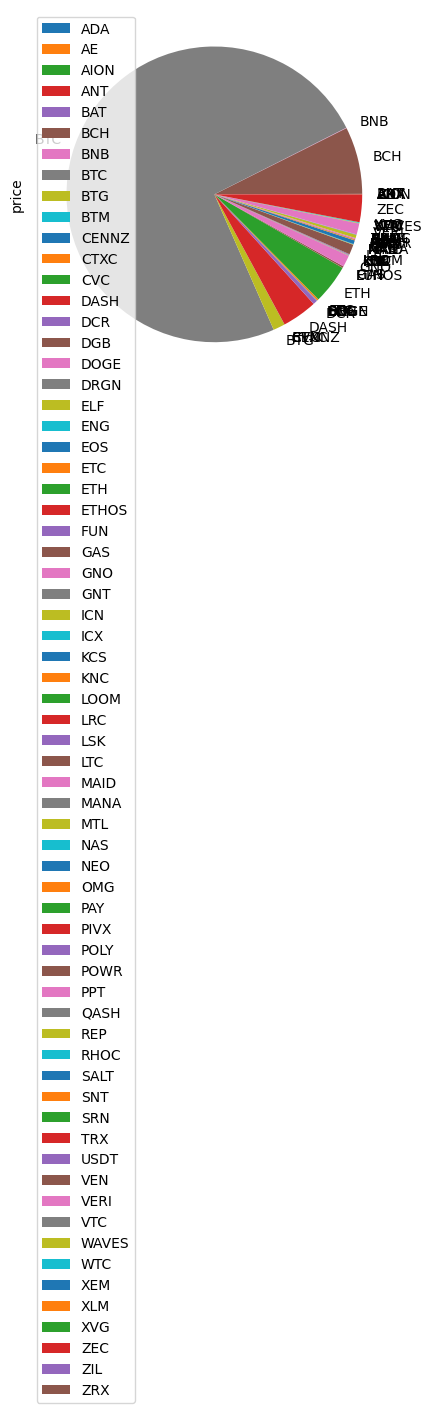

In [84]:
coins.groupby('symbol').sum().plot(kind='pie', y='price')